# Chapter 2

In [1]:
from summer import CompartmentalModel
import matplotlib.pyplot as plt

In [2]:
# Key input parameters in model
t_step = 1  # Size of time step (days)
total_population = 100000  # Total population size
ave_preinfous = 2  # Average pre-infectious period (days)
ave_infous = 2  # Average duration of infectiousness (days)
r0 = 2  # R0

# Parameters derived from the above, no need to consider time step, which is done automatically
beta = r0 / ave_infous  # No need to divide by population because this is part of infection_frequency
infous_rate = 1 / ave_preinfous
rec_rate = 1 / ave_infous

infectious_seed = 1

In [3]:
# Set up the SEIR model
compartments = ("Susceptible", "Pre-infectious", "Infectious", "Immune")
seir_model = CompartmentalModel(
    times=[0, 200],
    compartments=compartments,
    infectious_compartments=["Infectious"],
    timestep=t_step,
)
seir_model.set_initial_population(
    distribution={
        "Susceptible": total_population - infectious_seed, 
        "Infectious": infectious_seed
    }
)
seir_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=beta,
    source="Susceptible", 
    dest="Pre-infectious"
)
seir_model.add_transition_flow(
    name="progression", 
    fractional_rate=infous_rate,
    source="Pre-infectious", 
    dest="Infectious"
)
seir_model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)
seir_model.request_output_for_flow(
    name="incidence", 
    flow_name="progression"
)
seir_model.request_output_for_flow(
    name="infection", 
    flow_name="infection"
)

In [4]:
# Run the SEIR model
seir_model.run()

Text(0, 0.5, 'Number of new infectious persons/time step')

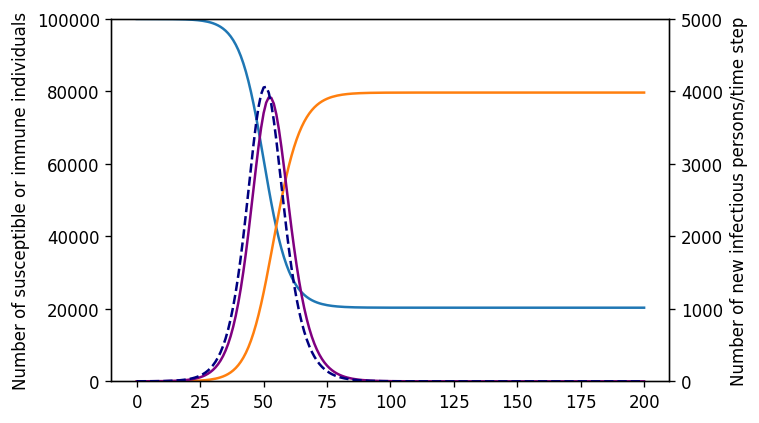

In [63]:
# Plot the outputs

# Create axes
fig, ax = plt.subplots(1, 1, dpi=120)
right_ax = ax.twinx()

# Plot
for compartment_idx in [0, -1]:
    ax.plot(seir_model.times, seir_model.outputs.T[compartment_idx])
right_ax.plot(seir_model.times, seir_model.derived_outputs["incidence"], color="purple")
right_ax.plot(seir_model.times, seir_model.derived_outputs["infection"], color="navy", linestyle="--")

# Tidy up
ax.set_ylim((0, 1e5))
ax.set_ylabel("Number of susceptible or immune individuals")
right_ax.set_ylim((0, 5000))
right_ax.set_ylabel("Number of new infectious persons/time step")

In [6]:
# Set up the SIR model
compartments = ("Susceptible", "Infectious", "Immune")
sir_model = CompartmentalModel(
    times=[0, 200],
    compartments=compartments,
    infectious_compartments=["Infectious"],
    timestep=t_step,
)
sir_model.set_initial_population(
    distribution={
        "Susceptible": total_population - infectious_seed, 
        "Infectious": infectious_seed
    }
)
sir_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=1, 
    source="Susceptible", 
    dest="Infectious"
)
sir_model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)
sir_model.request_output_for_flow(
    name="infection", 
    flow_name="infection"
)

In [7]:
# Run the SIR model
sir_model.run()

Text(0, 0.5, 'Number of new infectious persons/time step')

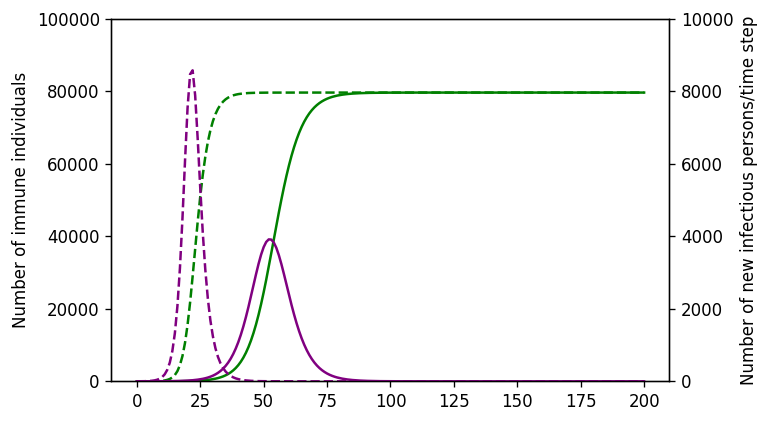

In [8]:
# Plot the outputs

# Create axes
fig, ax = plt.subplots(1, 1, dpi=120)
right_ax = ax.twinx()

# Plot
ax.plot(seir_model.times, seir_model.outputs.T[-1], color="green")
ax.plot(sir_model.times, sir_model.outputs.T[-1], color="green", linestyle="--")
right_ax.plot(seir_model.times, seir_model.derived_outputs["incidence"], color="purple")
right_ax.plot(sir_model.times, sir_model.derived_outputs["infection"], color="purple", linestyle="--")

# Tidy up
ax.set_ylim((0, 1e5))
ax.set_ylabel("Number of immune individuals")
right_ax.set_ylim((0, 1e4))
right_ax.set_ylabel("Number of new infectious persons/time step")

# Chapter 3

Text(0, 0.5, 'Number of infectious persons')

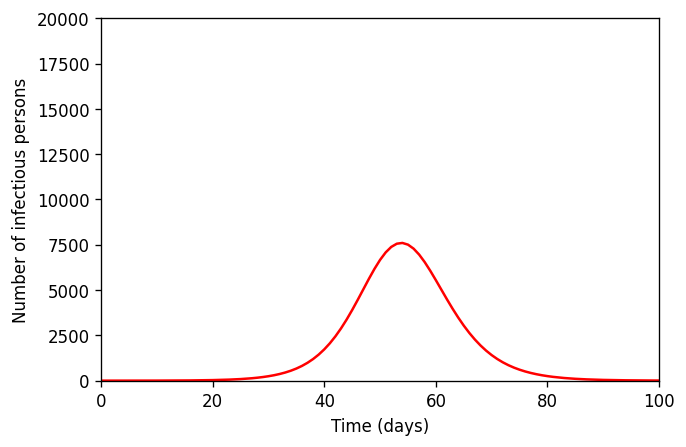

In [9]:
# No more analysis needed, straight to plotting
fig, ax = plt.subplots(1, 1, dpi=120)
ax.plot(seir_model.times, seir_model.outputs.T[2], color="red")
ax.set_xlim(0, 1e2)
ax.set_ylim((0, 2e4))
ax.set_xlabel("Time (days)")
ax.set_ylabel("Number of infectious persons")

## Model 3.2

In [33]:
# Recycle the parameters that are unchanged, but change the following:
ave_preinfous = 8
ave_infous = 7
r0 = 13
life_expectancy = 70

# Derived parameters
beta = r0 / ave_infous
infous_rate = 1 / ave_preinfous
rec_rate = 1 / ave_infous
m_rate = 1 / life_expectancy / 365

# Create the SEIR model with demographic processes
compartments = ("Susceptible", "Pre-infectious", "Infectious", "Immune")
seir_demog_model = CompartmentalModel(
    times=[0, 36500],
    compartments=compartments,
    infectious_compartments=["Infectious"],
    timestep=t_step,
)
seir_demog_model.set_initial_population(
    distribution={
        "Susceptible": total_population - infectious_seed, 
        "Infectious": infectious_seed
    }
)
seir_demog_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=beta,
    source="Susceptible", 
    dest="Pre-infectious"
)
seir_demog_model.add_transition_flow(
    name="progression", 
    fractional_rate=infous_rate,
    source="Pre-infectious", 
    dest="Infectious"
)
seir_demog_model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)
seir_demog_model.add_universal_death_flows(
    "universal_death",
    death_rate=m_rate
)
seir_demog_model.add_replacement_birth_flow(
    "births",
    "Susceptible"
)

seir_demog_model.request_output_for_flow(
    name="incidence", 
    flow_name="progression"
)

In [34]:
seir_demog_model.run()

Text(0, 0.5, 'Number of new infectious persons per time step')

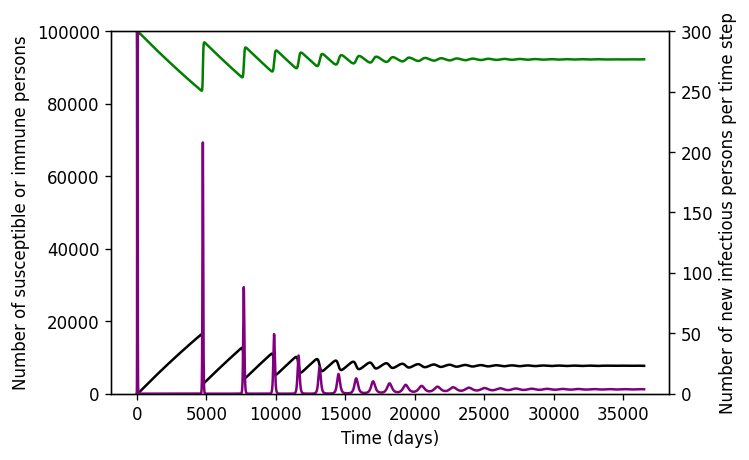

In [38]:
fig, ax = plt.subplots(1, 1, dpi=120)
ax.plot(seir_demog_model.times, seir_demog_model.outputs.T[0], color="black")
ax.plot(seir_demog_model.times, seir_demog_model.outputs.T[-1], color="green")
ax.set_ylim((0, 1e5))
ax.set_ylabel("Number of susceptible or immune persons")
ax.set_xlabel("Time (days)")

right_ax = ax.twinx()
right_ax.plot()
right_ax.plot(seir_demog_model.times, seir_demog_model.derived_outputs["incidence"], color="purple")
right_ax.set_ylim((0, 300))
right_ax.set_ylabel("Number of new infectious persons per time step")

# Chapter 4
## Model 4.1a
### Figure 2
Figure 1 only contains information in Figure 2.

Text(0, 0.5, 'Number of new infectious persons/time step')

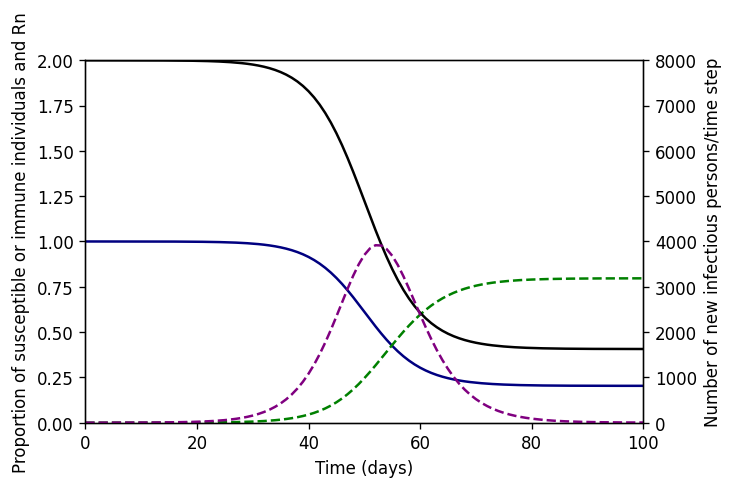

In [67]:
fig, ax = plt.subplots(1, 1, dpi=120)
prop_susceptible = [i_sus / total_population for i_sus in seir_model.outputs.T[0]]
prop_immune = [i_sus / total_population for i_sus in seir_model.outputs.T[-1]]
r0 = 2
rn = [i_prop_sus * r0 for i_prop_sus in prop_susceptible]

ax.plot(seir_model.times, prop_susceptible, color="navy")
ax.plot(seir_model.times, prop_immune, color="green", linestyle="--")
ax.plot(seir_model.times, rn, color="black")

ax.set_xlim(0, 1e2)
ax.set_ylim((0, 2))
ax.set_xlabel("Time (days)")
ax.set_ylabel("Proportion of susceptible or immune individuals and Rn")

right_ax = ax.twinx()
right_ax.plot(seir_model.times, seir_model.derived_outputs["incidence"], color="purple", linestyle="--")
right_ax.set_ylim((0, 8e3))
right_ax.set_ylabel("Number of new infectious persons/time step")

### Figure 3

(0.01, 10000.0)

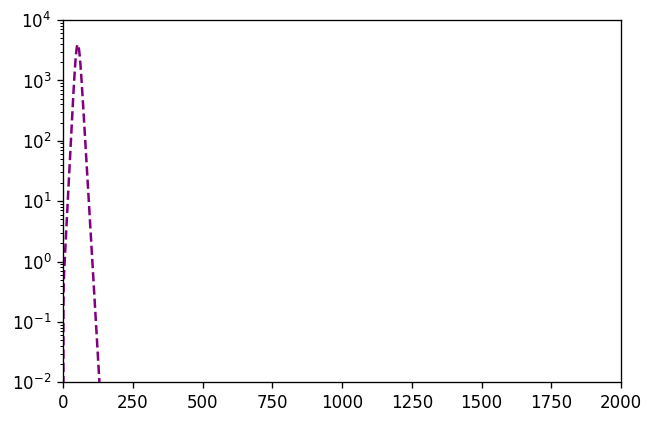

In [73]:
fig, ax = plt.subplots(1, 1, dpi=120)
ax.plot(seir_model.times, seir_model.derived_outputs["incidence"], color="purple", linestyle="--")
ax.set_xlim((0, 2e3))
ax.set_yscale("log")
ax.set_ylim((1e-2, 1e4))